In [1]:
# standard imports
import pandas as pd
import numpy as np
# import custom netdata stuff from our package
from netdata_api_utils.utils import api, get_metrics

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## df_allmetrics

In [2]:
#df_allmetrics[df_allmetrics['name'].str.contains('random')]

In [3]:
df_allmetrics = pd.DataFrame.from_dict(api(endpoint='allmetrics',options='?format=json'),orient='index')
print(df_allmetrics.shape)
df_allmetrics.sample(10)

(215, 5)


,name,context,units,last_updated,dimensions
ipv6.udppackets,ipv6.udppackets,ipv6.udppackets,packets/s,1569271171,"{'InDatagrams': {'name': 'received', 'value': ..."
users.cpu_system,users.cpu_system,users.cpu_system,percentage,1569271171,"{'ntp': {'name': 'ntp', 'value': 0.0}, 'root':..."
system.ip,system.ip,system.ip,kilobits/s,1569271171,"{'InOctets': {'name': 'received', 'value': 80...."
netdata.plugin_proc_modules,netdata.plugin_proc_modules,netdata.plugin_proc_modules,milliseconds/run,1569271171,"{'stat': {'name': 'stat', 'value': 0.219}, 'up..."
groups.pwrites,groups.pwrites,groups.pwrites,KiB/s,1569271171,"{'ntp': {'name': 'ntp', 'value': 0.0}, 'root':..."
disk_util.sda,disk_util.sda,disk.util,% of time working,1569271171,"{'utilization': {'name': 'utilization', 'value..."
system.processes,system.processes,system.processes,processes,1569271171,"{'running': {'name': 'running', 'value': 3.0},..."
users.major_faults,users.major_faults,users.major_faults,page faults/s,1569271171,"{'ntp': {'name': 'ntp', 'value': 0.0}, 'root':..."
cpu.cpu0,cpu.cpu0,cpu.cpu,percentage,1569271171,"{'guest_nice': {'name': 'guest_nice', 'value':..."
cpu.cpu1_interrupts,cpu.cpu1_interrupts,cpu.interrupts,interrupts/s,1569271171,"{'27': {'name': 'virtio1-input.1_27', 'value':..."


## df

In [4]:
n_metrics = 10
mins_lag = 60*4
#metrics_list = np.random.choice(df_allmetrics['name'].unique(),n_metrics,replace=False).tolist()
metrics_list = [metric for metric in df_allmetrics['name'].unique() if 'cpu' in metric]
#metrics_list ['users.cpu']
df = get_metrics(metrics_list,after=-(60*mins_lag),before=0)
print(df['timestamp'].min(),df['timestamp'].max())
print(df.shape)
df.sample(10)

2019-09-23 20:03:05 2019-09-23 20:37:21
(1953, 4)


,timestamp,key,label,value
4,2019-09-23 20:20:13,system.cpu,guest_nice,0.000000
87,2019-09-23 20:11:39,apps.cpu_user,dhcp,0.000000
92,2019-09-23 20:28:47,apps.cpu_user,cron,0.000000
26,2019-09-23 20:03:05,groups.cpu_system,netdata,0.436935
84,2019-09-23 20:24:30,apps.cpu_system,dhcp,0.000000
97,2019-09-23 20:07:22,apps.cpu,cron,0.000000
28,2019-09-23 20:33:04,cpu.cpu3_softnet_stat,received_rps,0.000000
37,2019-09-23 20:33:04,cpu.cpu3,irq,0.000000
31,2019-09-23 20:20:13,cpu.cpu0_softnet_stat,received_rps,0.000000
11,2019-09-23 20:28:47,apps.cpu,apps.plugin,0.352439


## Save Data

In [5]:
# save sample of data
df.to_csv('../data/netdata_sample.csv',index=False)

## Plots

/home/andrewm4894/anaconda3/envs/netdata-learn/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


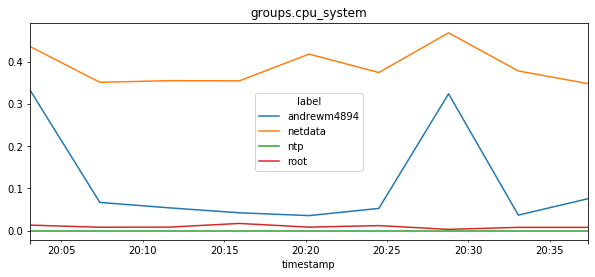

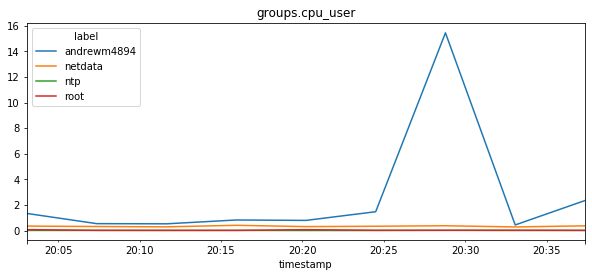

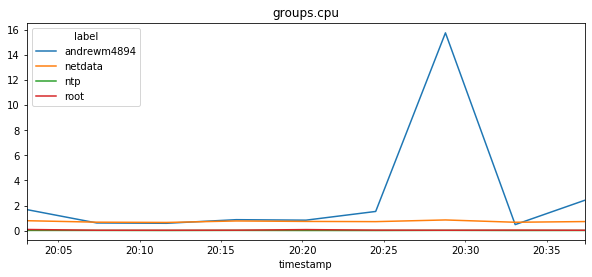

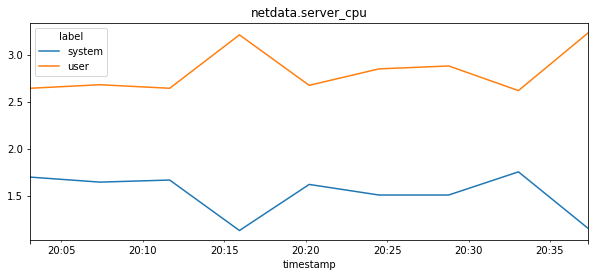

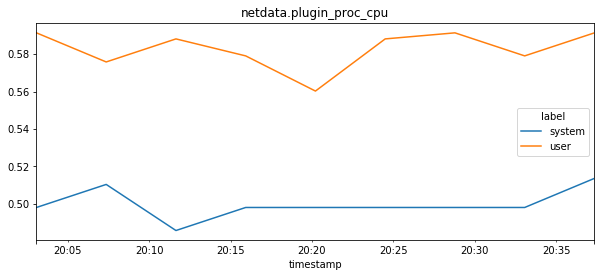

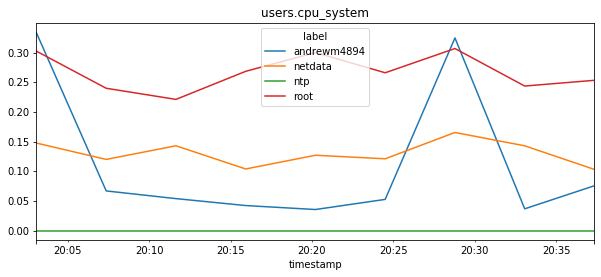

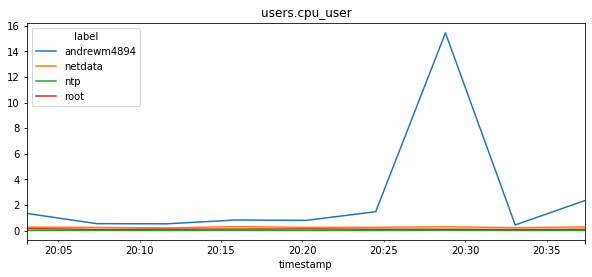

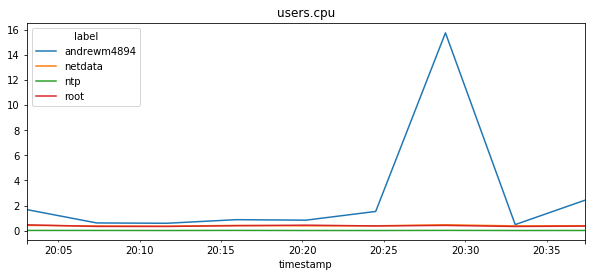

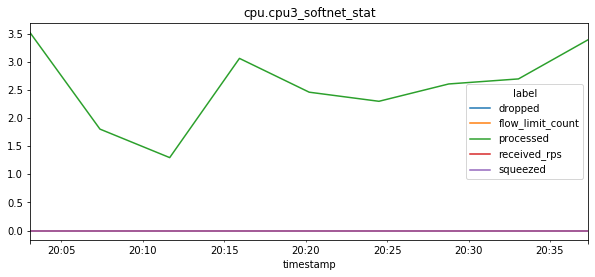

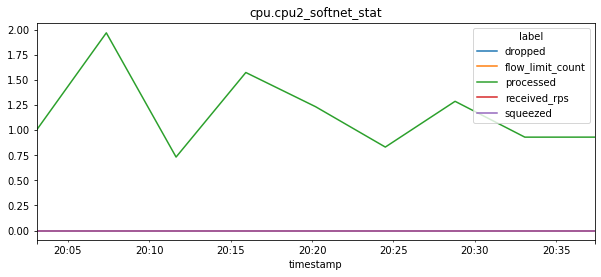

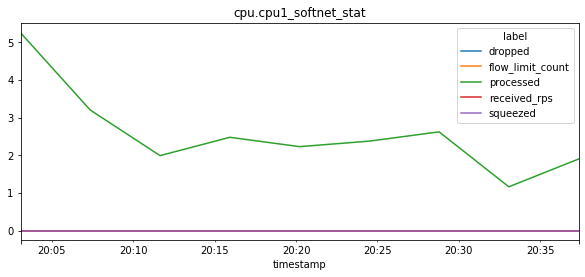

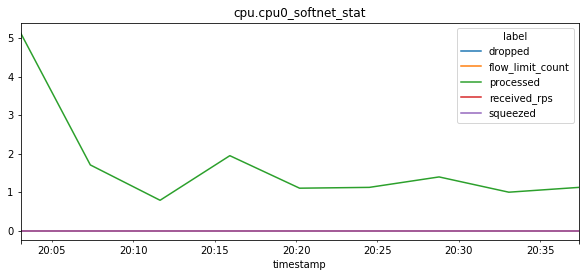

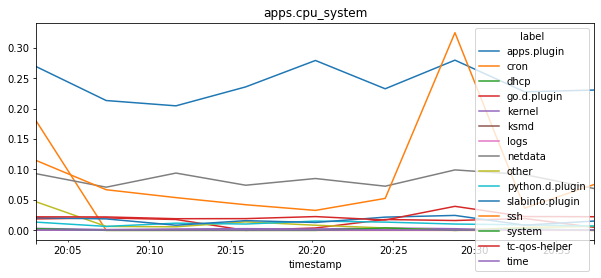

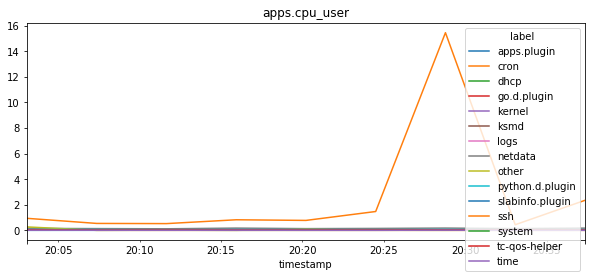

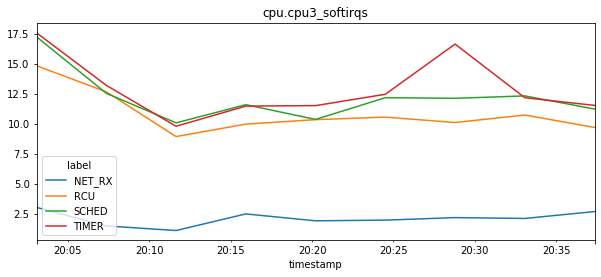

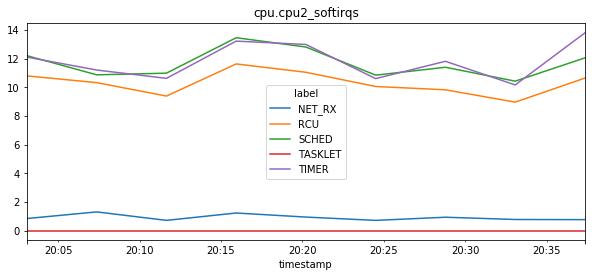

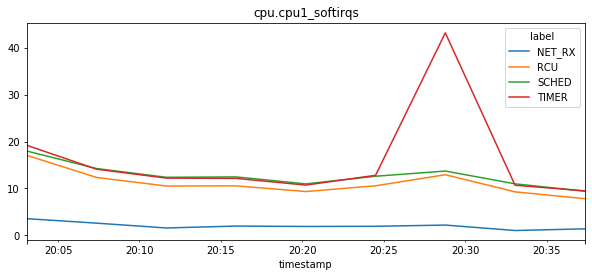

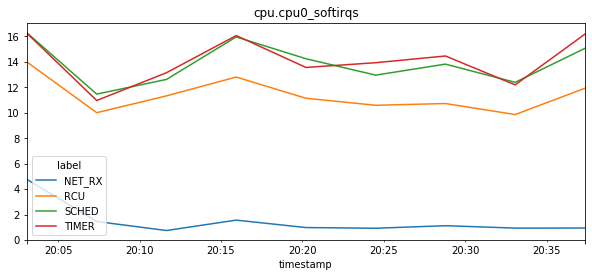

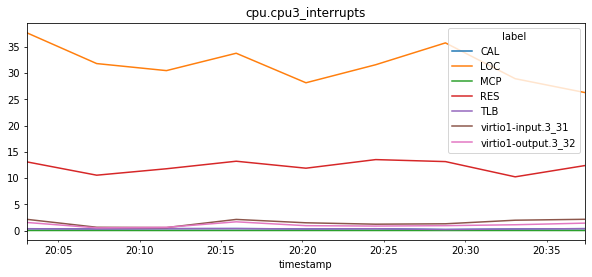

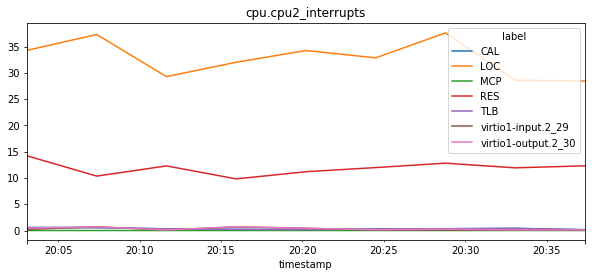

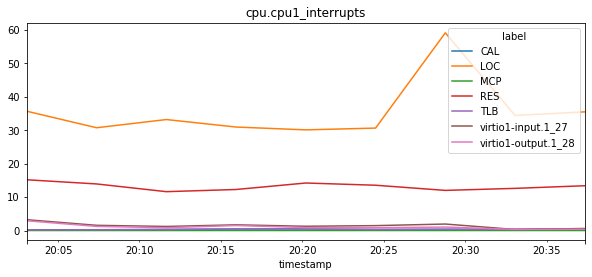

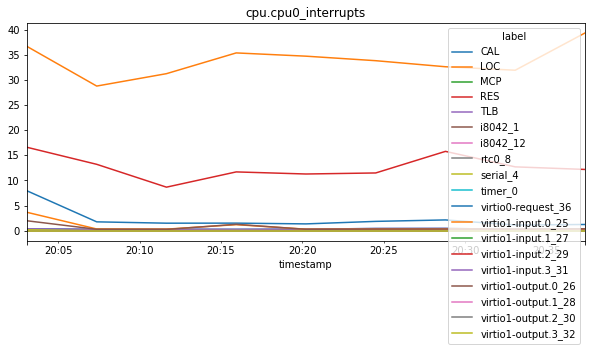

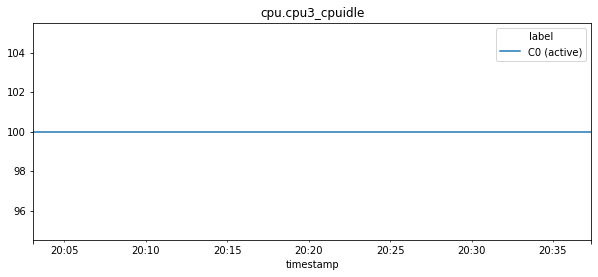

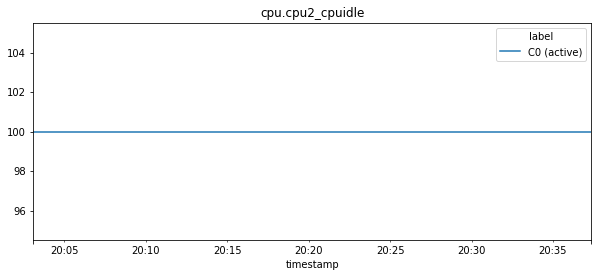

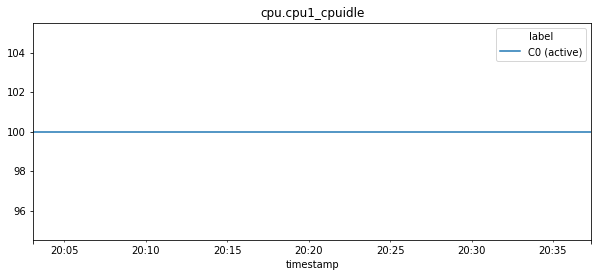

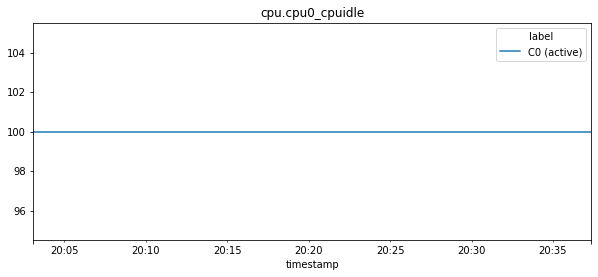

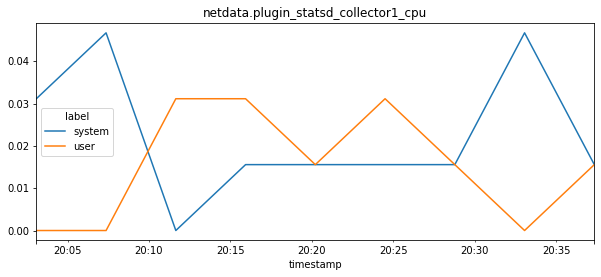

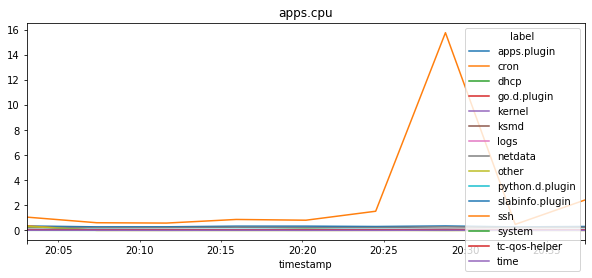

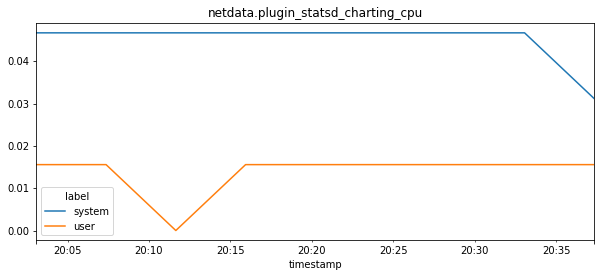

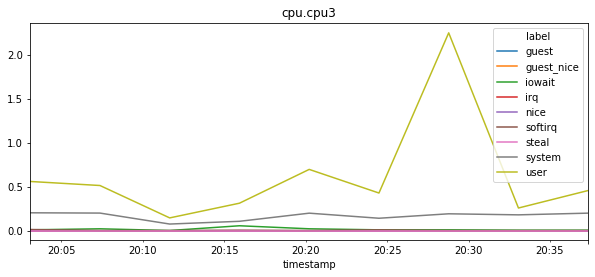

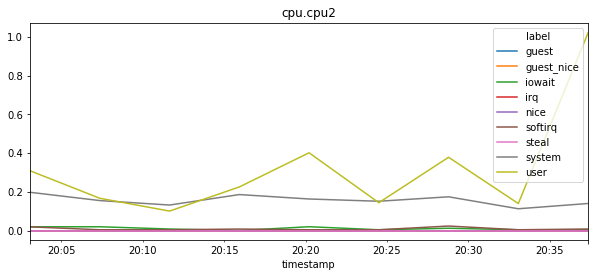

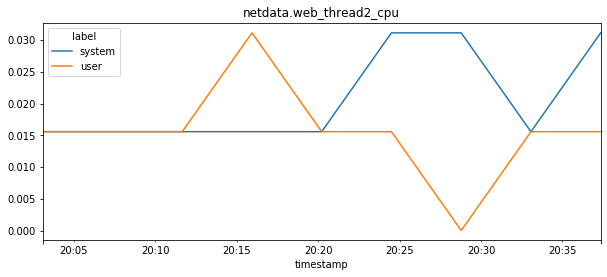

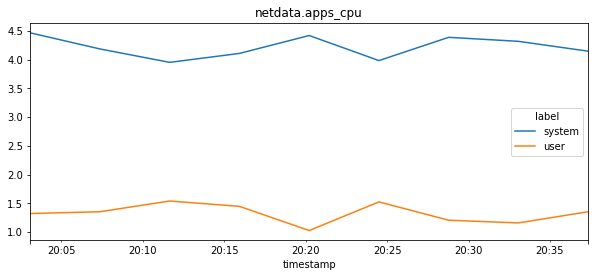

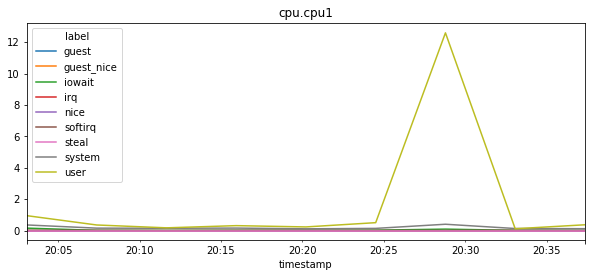

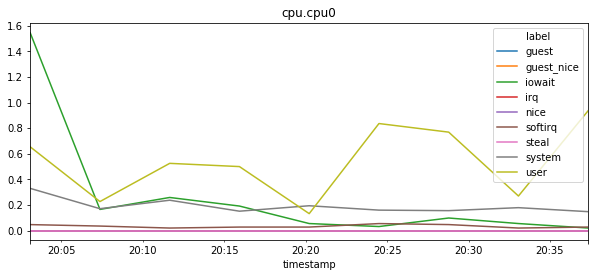

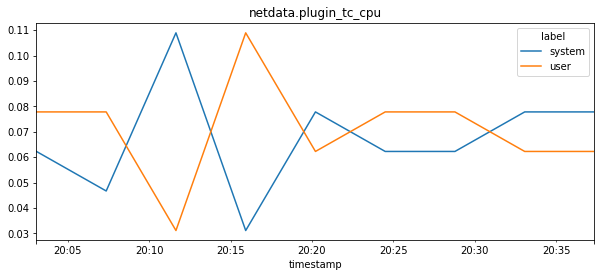

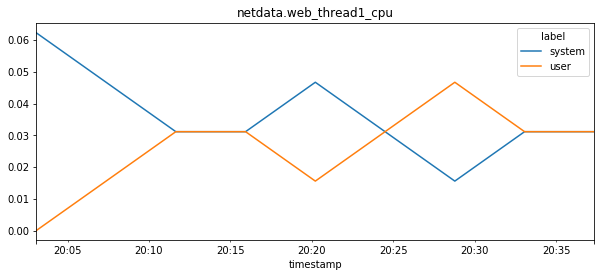

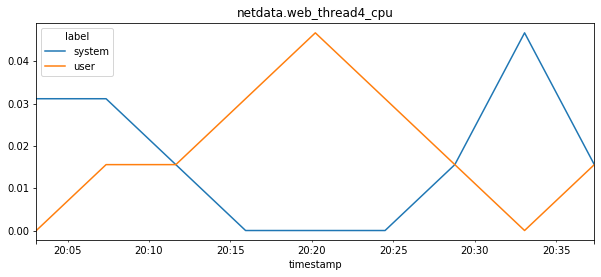

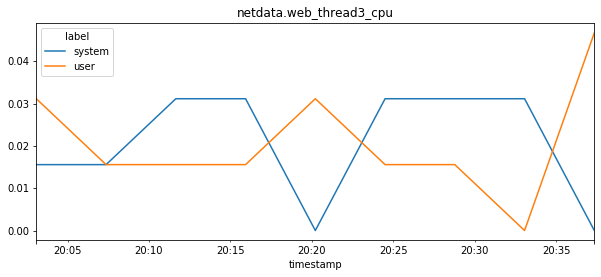

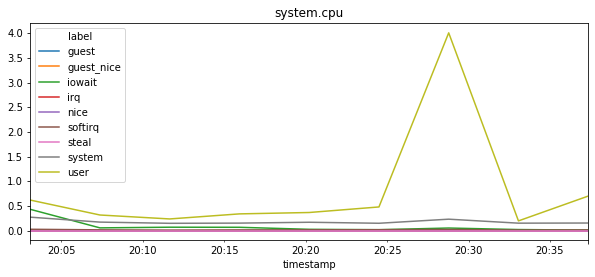

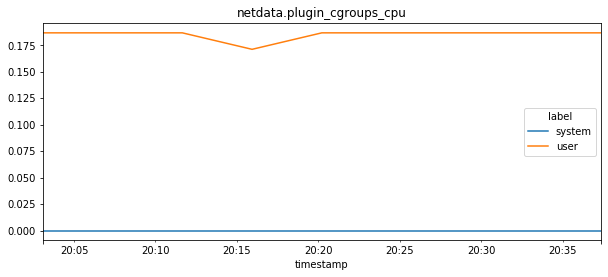

In [6]:
# plots
for metric in metrics_list:
    df[df['key']==metric].pivot(index='timestamp',columns='label',values='value').plot(title=metric, figsize=(10,4))